In this Data Project we will be looking at data from the 2016 election.

In this project we will analyze two datasets. The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?
2.) Did the poll results favor Romney or Obama?
3.) How do undecided voters effect the poll?
4.) Can we account for the undecided voters?
5.) How did voter sentiment change over time?
6.) Can we see an effect in the polls from the debates?

We'll discuss the second data set later on!

Let's go ahead and start with our standard imports:

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
import requests

from io import StringIO

In [12]:
url = 'https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

source = requests.get(url).text

poll_data = StringIO(source)

In [13]:
poll_df = pd.read_csv(poll_data)

In [14]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


In [15]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


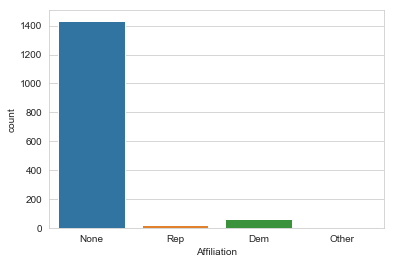

In [16]:
#Affiliation is not playing a major role
sns.countplot('Affiliation', data=poll_df)

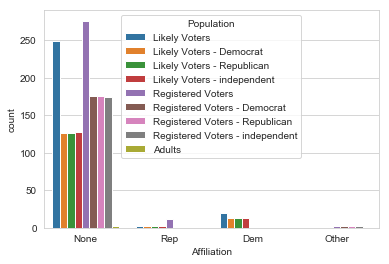

In [17]:
sns.countplot('Affiliation', hue = 'Population',data=poll_df)

In [18]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [32]:
#Let's go ahead and take a look at the averages for Trump and Clinton , 
#and the polled people who remained undecided.

avg = pd.DataFrame(poll_df.mean())

avg.drop('Number of Observations',inplace=True)

In [33]:
avg.head()

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068
Question Iteration,1.216820


In [34]:
std = pd.DataFrame(poll_df.std())

std.drop('Number of Observations',axis =0,inplace=True)
#std.drop('Number of Observations'), inplace means permenantely change

In [35]:
std.head()

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118
Question Iteration,0.412214


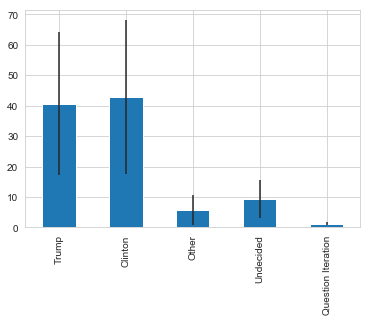

In [38]:
avg.plot(yerr = std, kind='bar',legend = False)

In [39]:
avg

,0
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068
Question Iteration,1.216820


In [40]:
std

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118
Question Iteration,0.412214


In [41]:
poll_avg = pd.concat([avg,std],axis=1)

In [43]:
poll_avg.columns = [['Average', 'Standard Diviation']]

In [58]:
poll_avg

,Average,Standard Diviation
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118
Question Iteration,1.216820,0.412214


In [62]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02


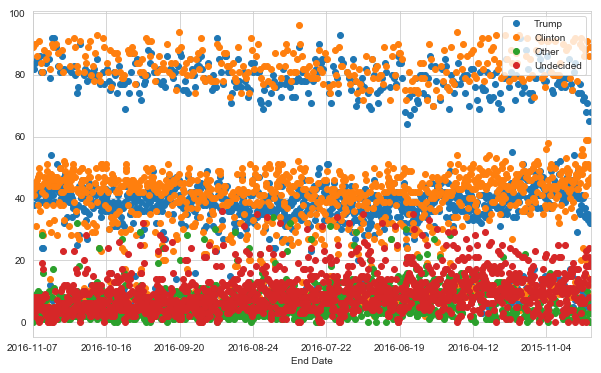

In [49]:
# Quick plot of sentiment in the polls versus time.
poll_df.plot(x='End Date',y=['Trump','Clinton','Other','Undecided'],linestyle = '',marker='o',figsize=[10,6])

In [60]:
from datetime import datetime

In [64]:
#Create a new column

poll_df['Difference']=(poll_df.Trump - poll_df.Clinton)/100

poll_df.head()

#Output showing that Trump is leading if positive, else Clinton is leading

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02


In [66]:
# Set as_index=Flase to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day.
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()

poll_df.head()

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [75]:
poll_df1 = poll_df[['Number of Observations','Trump','Clinton','Other','Undecided']]

In [78]:
poll_df1['Difference']=(poll_df.Trump - poll_df.Clinton)/100

TypeError: unsupported operand type(s) for -: 'DataFrameGroupBy' and 'DataFrameGroupBy'

In [83]:
# Set as_index=Flase to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day.
poll_df
